In [1]:
import pandas as pd
import numpy as np

# Load the training and validation datasets
train_data = pd.read_csv("/kaggle/input/twitter-sentimental-analysis/twitter_training.csv")
validation_data = pd.read_csv("/kaggle/input/twitter-sentimental-analysis/twitter_validation.csv")

# Display the first few rows of both datasets
train_head = train_data.head()
validation_head = validation_data.head()

train_head, validation_head

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [2]:
# Check for missing values
missing_train = train_data.isnull().sum()
missing_validation = validation_data.isnull().sum()

# Check for duplicate rows
duplicates_train = train_data.duplicated().sum()
duplicates_validation = validation_data.duplicated().sum()

missing_train, missing_validation, duplicates_train, duplicates_validation

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

In [3]:
# Checking the distribution of sentiment labels
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()
validation_sentiment_distribution = validation_data.iloc[:, 2].value_counts()

# Checking the number of unique entities in the training set
unique_entities_train = train_data.iloc[:, 1].nunique()

train_sentiment_distribution, validation_sentiment_distribution, unique_entities_train

(Positive
 Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: count, dtype: int64,
 Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 32)

In [4]:
# Remove duplicate rows from the training set
train_data_cleaned = train_data.drop_duplicates()

# Drop rows with missing tweet/message values
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

# Verify the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(0,
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

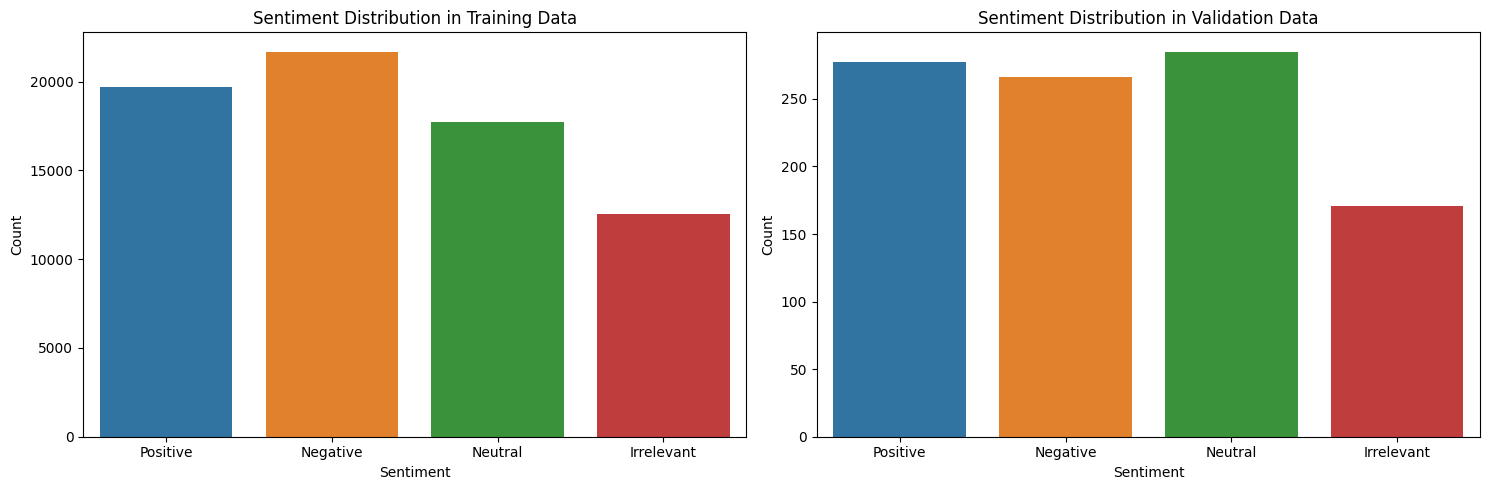

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=validation_data, x=validation_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

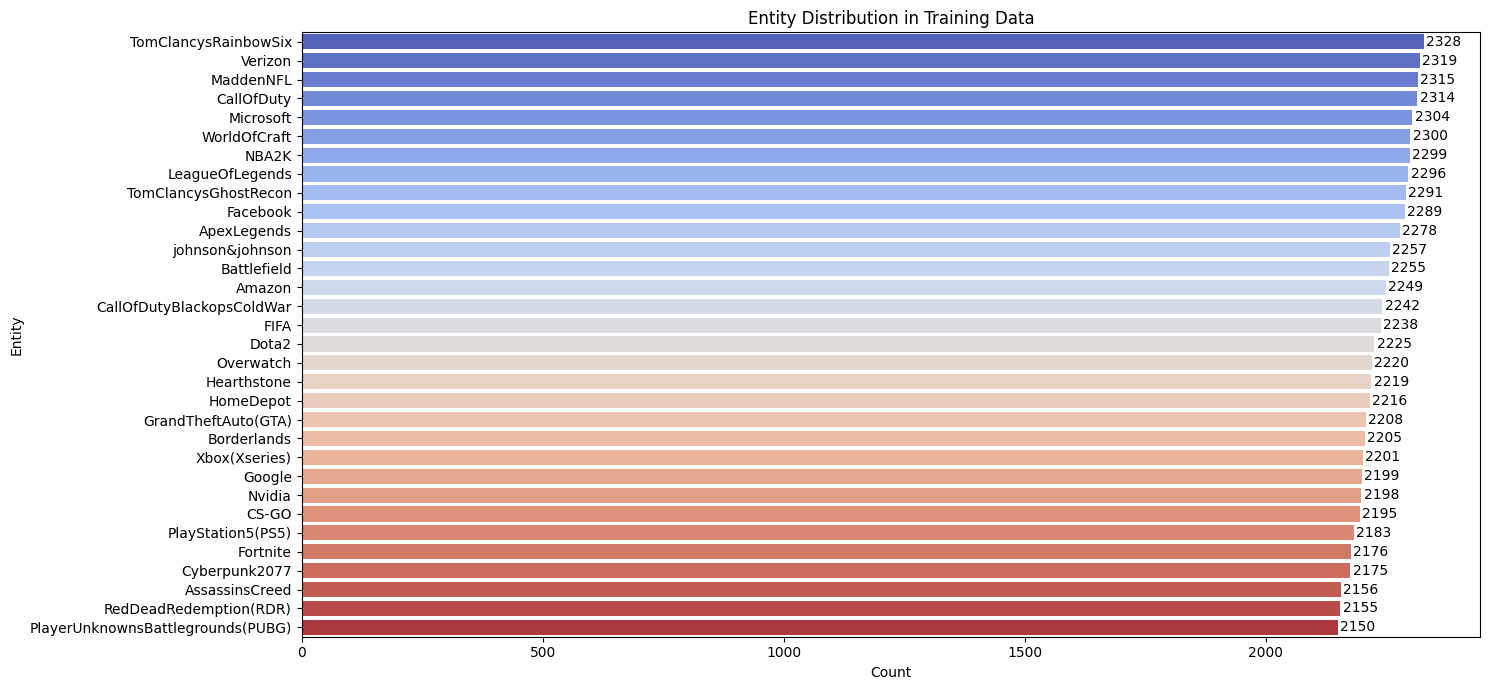

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data with a different color palette
ax = sns.countplot(
    data=train_data_cleaned,
    y=train_data_cleaned.columns[1],
    order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index,
    palette='coolwarm'  # Change palette here
)

# Add count labels to each bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2,
            int(width), va='center', fontsize=10)

# Set titles and labels
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


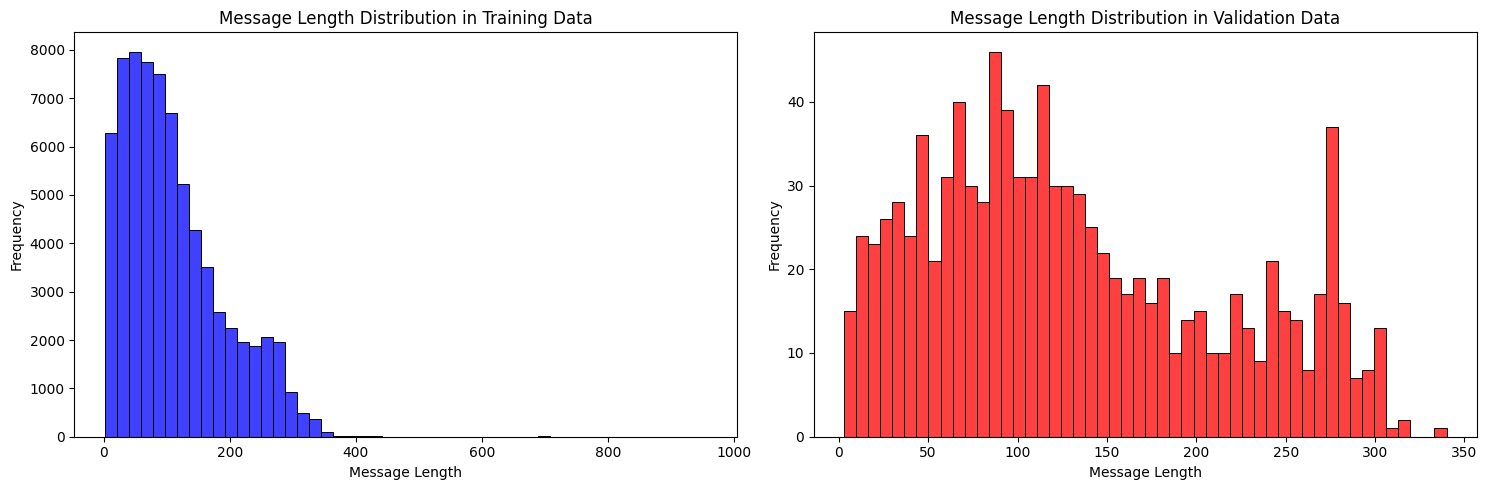

In [7]:
# Calculate the length of each message
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(len)
validation_data['message_length'] = validation_data[validation_data.columns[3]].apply(len)

# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution for training data (blue)
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color='blue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data (red)
sns.histplot(validation_data['message_length'], bins=50, ax=ax[1], color='red')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()


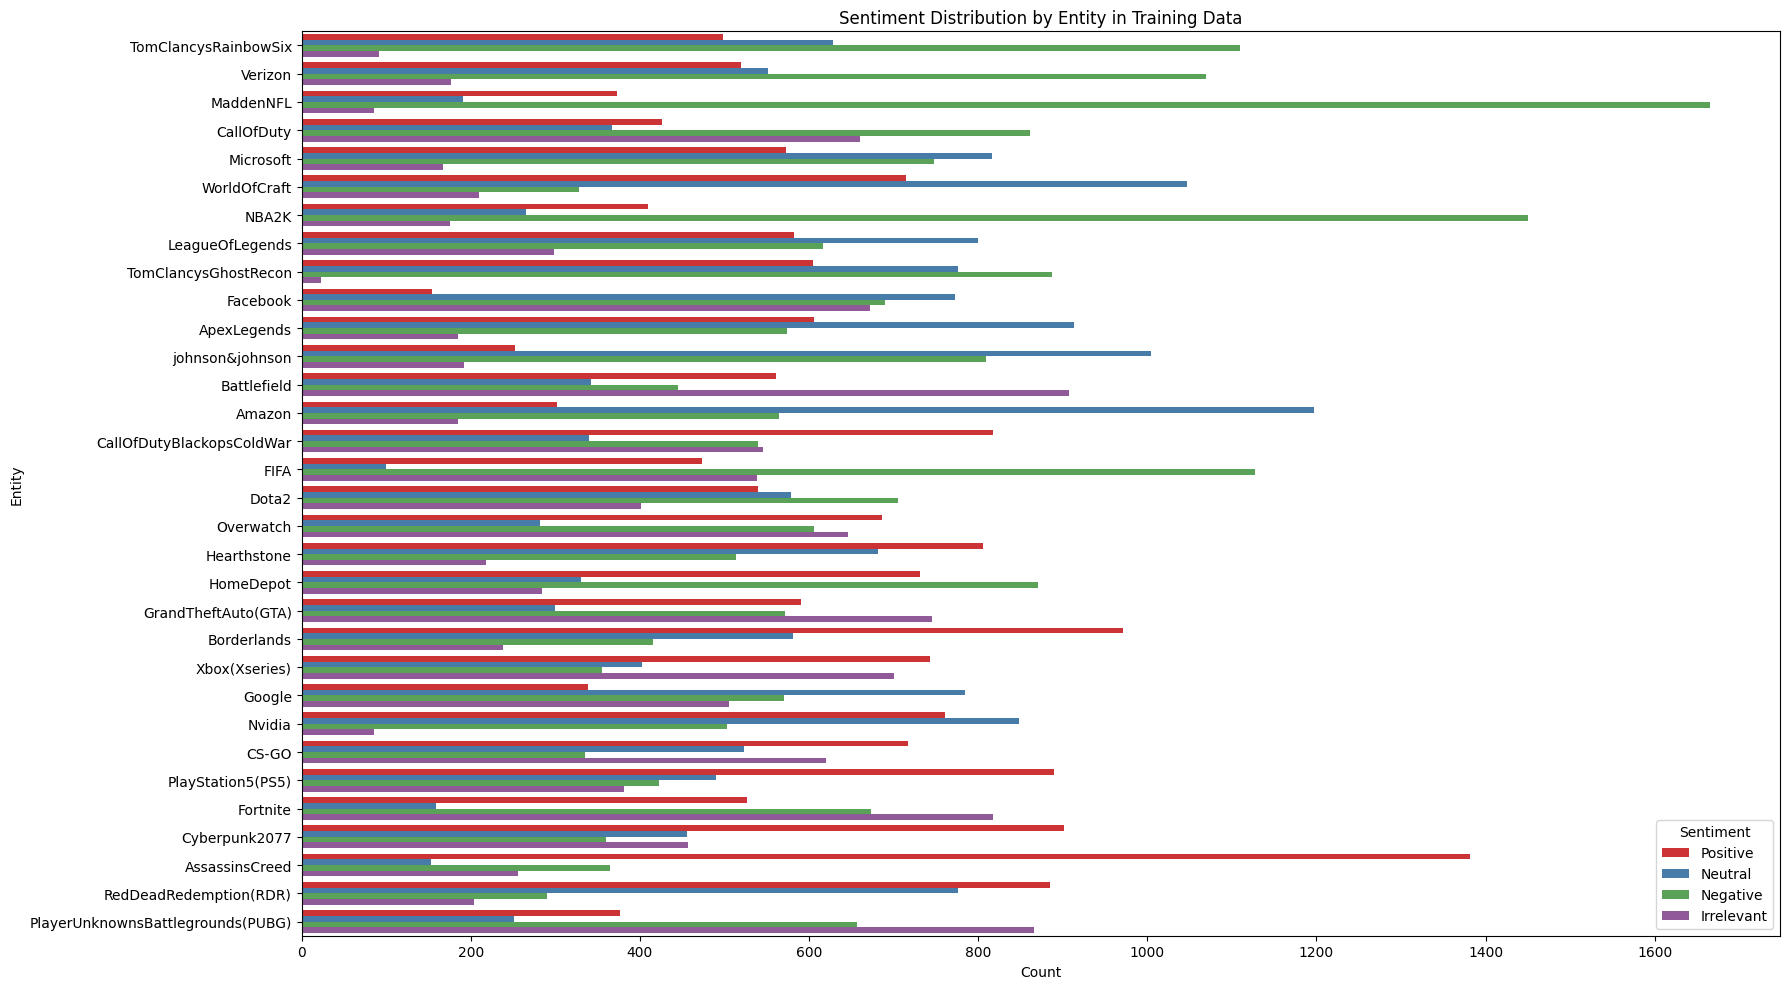

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(
    data=train_data_cleaned,
    y=train_data_cleaned.columns[1],
    hue=train_data_cleaned.columns[2],
    order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index,
    palette='Set1'  # Changed from 'viridis' to 'Set1'
)

plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


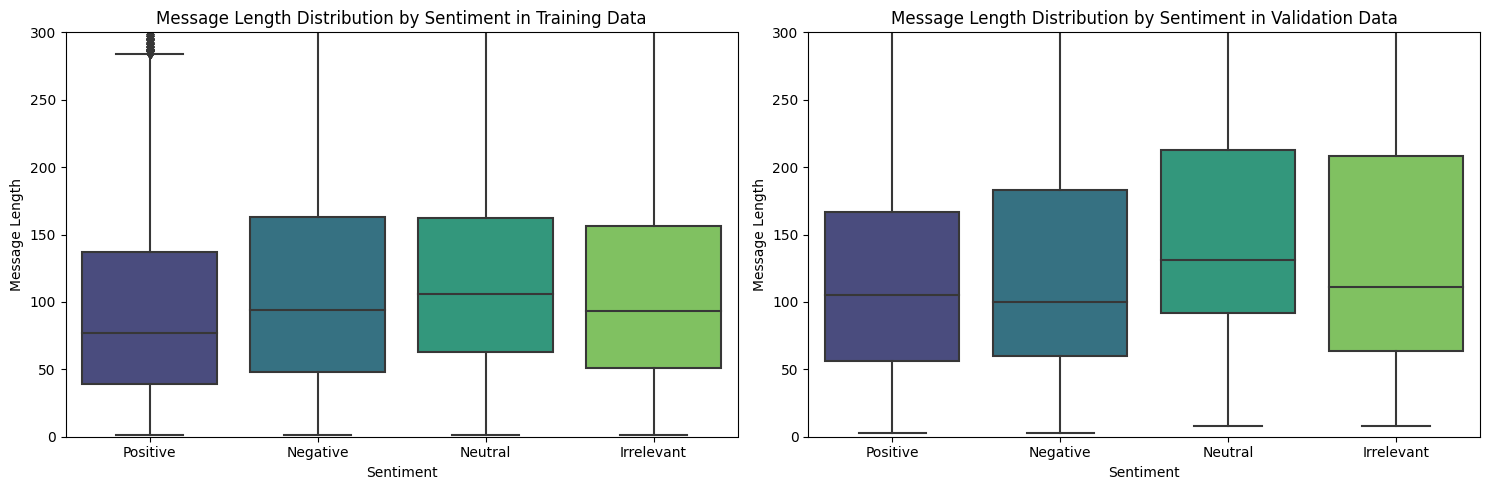

In [9]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)  # limiting y-axis for better visualization

# Plot message length distribution by sentiment for validation data
sns.boxplot(data=validation_data, x=validation_data.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)  # limiting y-axis for better visualization

plt.tight_layout()
plt.show()

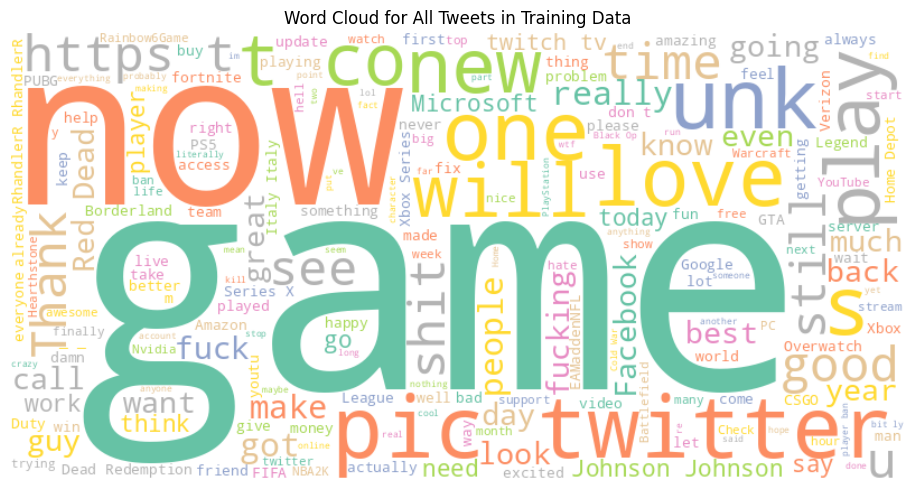

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all tweets
all_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned.columns[3]])

# Define stopwords and generate word cloud
stopwords = set(STOPWORDS)
wordcloud_all = WordCloud(
    stopwords=stopwords,
    background_color='white',
    width=800,
    height=400,
    colormap='Set2'  # Better color variety
).generate(all_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.tight_layout()
plt.show()


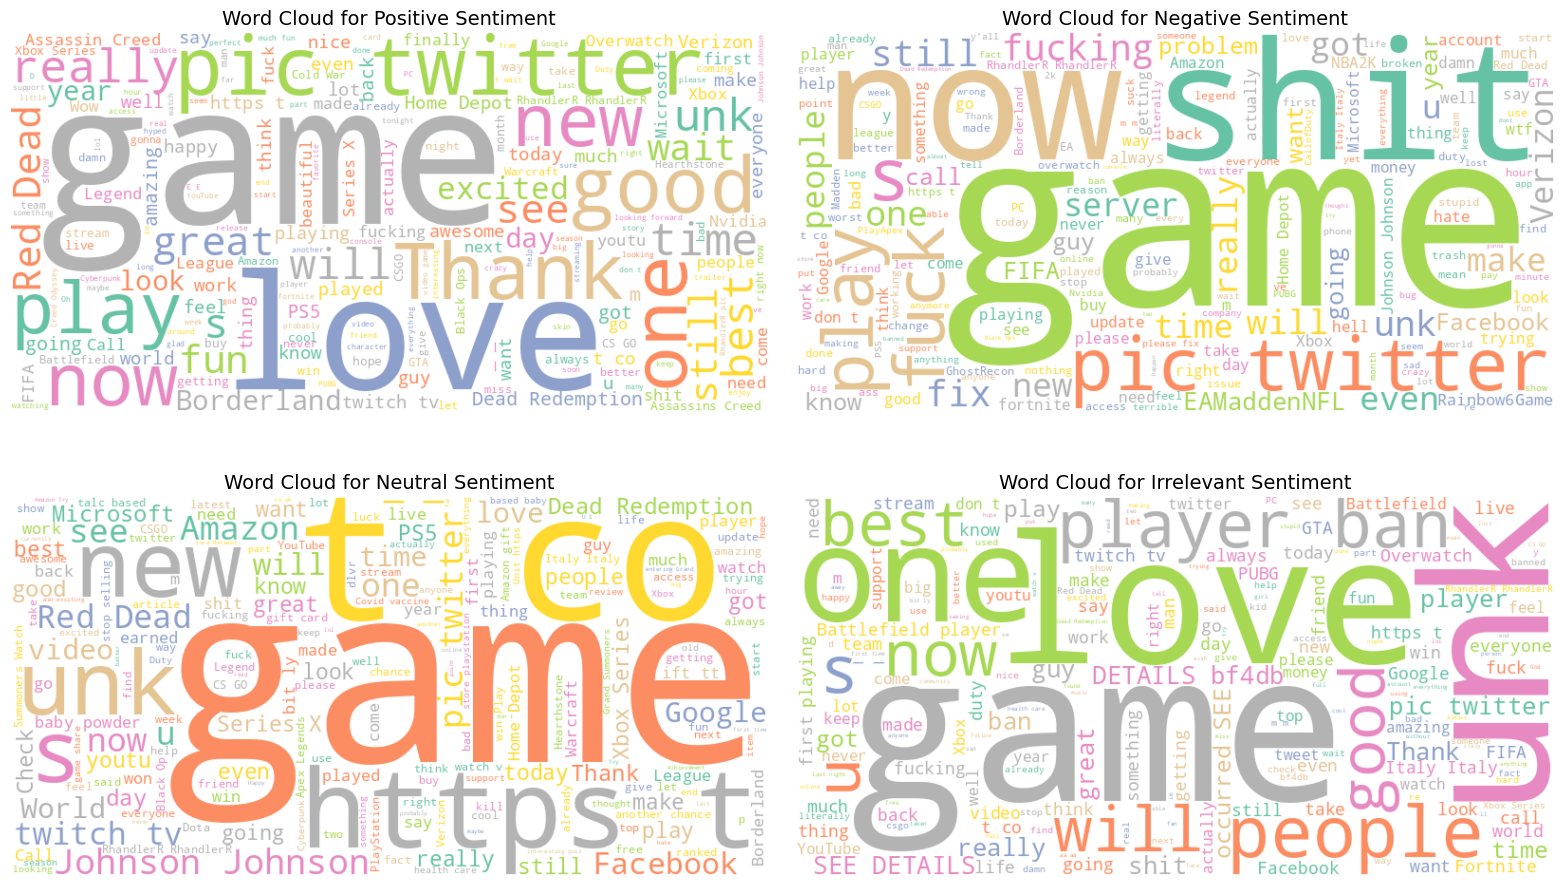

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Initialize sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
stopwords = set(STOPWORDS)

# Set up the plots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Generate and plot word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_df = train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == sentiment]
    sentiment_text = " ".join(tweet for tweet in sentiment_df[train_data_cleaned.columns[3]])
    
    if sentiment_text.strip():  # Proceed only if text is not empty
        wordcloud_sentiment = WordCloud(
            stopwords=stopwords,
            background_color='white',
            width=800,
            height=400,
            colormap='Set2'
        ).generate(sentiment_text)
        
        ax.imshow(wordcloud_sentiment, interpolation='bilinear')
        ax.set_title(f'Word Cloud for {sentiment} Sentiment', fontsize=14)
    else:
        ax.text(0.5, 0.5, f'No data for {sentiment}', horizontalalignment='center',
                verticalalignment='center', fontsize=14)
    
    ax.axis('off')

plt.tight_layout(pad=2)
plt.show()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Alternative function to preprocess text without lemmatization or NLTK stopwords
def preprocess_text_simplified(text):
    # Convert to lowercase
    text = text.lower()
    # Simple tokenization using split (without relying on NLTK)
    tokens = text.split()
    # Remove special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    return " ".join(tokens)

# Apply simplified preprocessing to training data
train_data_cleaned['processed_message_simplified'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(preprocess_text_simplified)

# Extract most frequent terms using CountVectorizer with simplified preprocessing
vectorizer_simplified = CountVectorizer(max_features=20)
X_simplified = vectorizer_simplified.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_terms_simplified = vectorizer_simplified.get_feature_names_out()

frequent_terms_simplified

array(['and', 'but', 'for', 'game', 'have', 'in', 'is', 'it', 'just',
       'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'with',
       'you'], dtype=object)

In [13]:
# Adjusting the labels: Convert "Irrelevant" labels to "Neutral"
train_data_cleaned[train_data_cleaned.columns[2]] = train_data_cleaned[train_data_cleaned.columns[2]].replace('Irrelevant', 'Neutral')
validation_data[validation_data.columns[2]] = validation_data[validation_data.columns[2]].replace('Irrelevant', 'Neutral')

# Check the updated sentiment distribution in the training and validation data
updated_train_sentiment_distribution = train_data_cleaned[train_data_cleaned.columns[2]].value_counts()
updated_validation_sentiment_distribution = validation_data[validation_data.columns[2]].value_counts()

updated_train_sentiment_distribution, updated_validation_sentiment_distribution

(Positive
 Neutral     30245
 Negative    21698
 Positive    19712
 Name: count, dtype: int64,
 Irrelevant
 Neutral     456
 Positive    277
 Negative    266
 Name: count, dtype: int64)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for computational efficiency

# Fit and transform the preprocessed text from the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned['processed_message_simplified'])

# Apply simplified preprocessing to the validation data
validation_data['processed_message_simplified'] = validation_data[validation_data.columns[3]].apply(preprocess_text_simplified)

# Transform the preprocessed text from the validation data
X_validation_tfidf = tfidf_vectorizer.transform(validation_data['processed_message_simplified'])

# Extract target labels for training and validation
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_validation = validation_data[validation_data.columns[2]]

X_train_tfidf.shape, X_validation_tfidf.shape

((71655, 5000), (999, 5000))

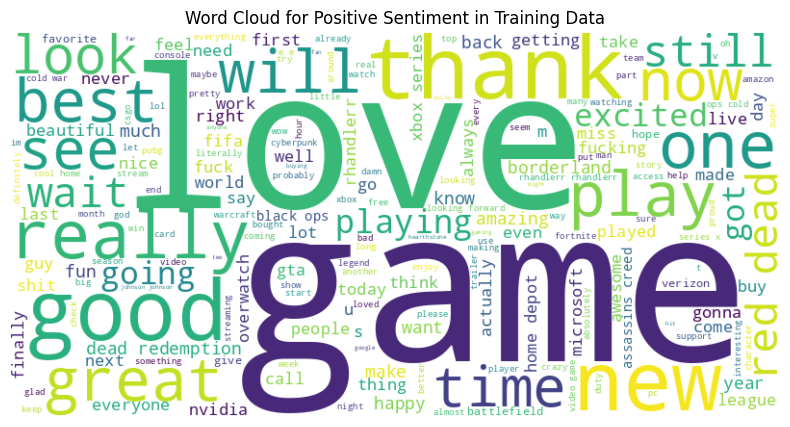

In [15]:
# Extract text for Positive sentiment from the training dataset
positive_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == 'Positive']['processed_message_simplified'])

# Generate word cloud for Positive sentiment
wordcloud_positive = WordCloud(background_color='white', width=800, height=400).generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment in Training Data')
plt.show()


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define the target variable for training and validation again
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_validation = validation_data[validation_data.columns[2]]

# Create the ML pipeline with TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(solver='sag', multi_class='auto', max_iter=10000))  # using 'sag' solver for faster convergence
])

# Train the pipeline model using the training data
pipeline.fit(train_data_cleaned['processed_message_simplified'], y_train)

# Validate the model's performance on the validation dataset
validation_accuracy = pipeline.score(validation_data['processed_message_simplified'], y_validation)

validation_accuracy

0.8058058058058059